## Tour & Travels Customer Churn Prediction

### Project Introduction

### About this dataset
The Tour & Travels Customer Churn Prediction dataset assists a travel company in
predicting customer churn. It includes indicators such as age, frequent flyer status,
annual income class, services opted frequency, social media account
synchronization, and hotel bookings.

### Project Objectives

1. **Develop a Predictive Model**: Utilize logistic regression to build a predictive model for customer churn based on the provided dataset.
   
2. **Identify Key Predictors**: Determine which factors from the dataset have the most significant influence on customer churn.

3. **Optimize Model Performance**: Fine-tune the logistic regression model to maximize its predictive accuracy. This may involve parameter tuning, feature selection, or other optimization techniques.

4. **Evaluate Model Robustness**: Assess the reliability and robustness of the developed model through cross-validation and performance metrics such as accuracy, precision, recall, and F1-score.

5. **Provide Insights for Business Decision-Making**: Translate the findings from the predictive model into actionable insights for the travel company. This could involve identifying at-risk customer segments, recommending targeted retention strategies, or optimizing service offerings.

In [1]:
import opendatasets as od 

od.download("https://www.kaggle.com/datasets/tejashvi14/tour-travels-customer-churn-prediction")

Skipping, found downloaded files in ".\tour-travels-customer-churn-prediction" (use force=True to force download)


In [2]:

## importing library
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline


In [3]:
## importing the datasets. 
df = pd.read_csv("tour-travels-customer-churn-prediction/Customertravel.csv")
print("done")

done


### EDA Before Preprocessing

In [4]:
df.head(5)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [6]:
df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [7]:
df.columns

Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'],
      dtype='object')

In [8]:
df.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


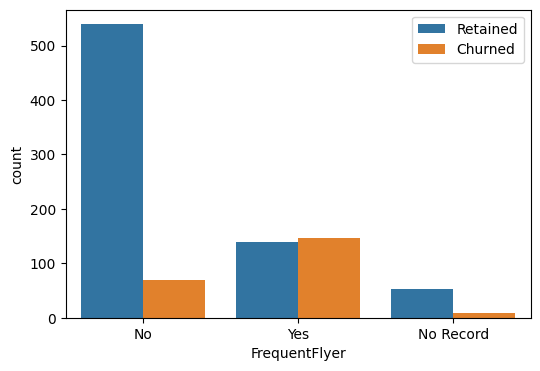

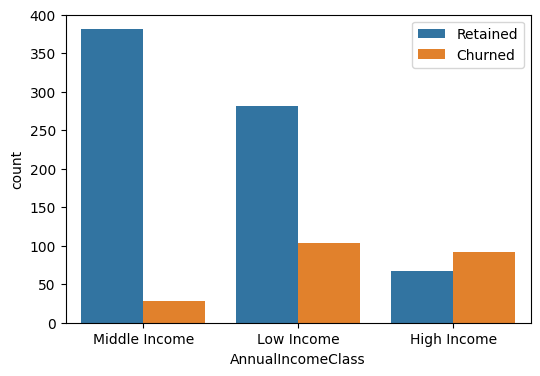

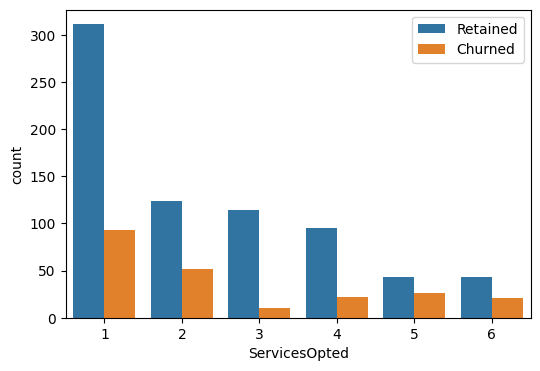

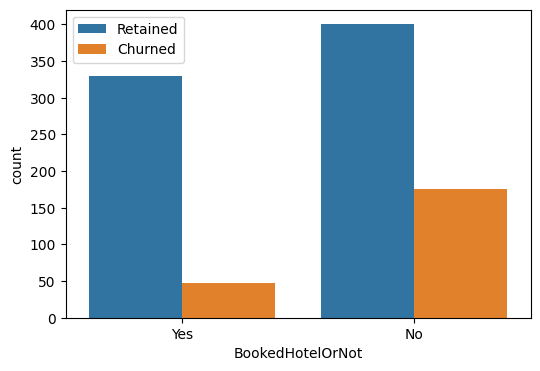

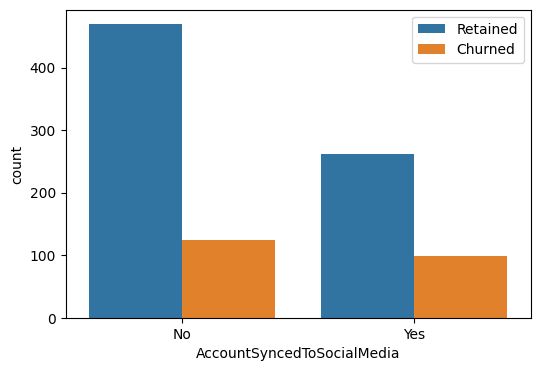

In [9]:
## creating a function to visualize the distribution of categorical variables as it relates to the rate of churn among customers. 
def plot(feature):
    plt.figure(figsize=(6,4))
    sns.countplot(x=feature, data=df, hue='Target')
    plt.legend(labels=["Retained", "Churned"])
    plt.show()
    
    
df_cat = df[["FrequentFlyer", "AnnualIncomeClass", "ServicesOpted", "BookedHotelOrNot", 'AccountSyncedToSocialMedia']]

for i in df_cat:
    plot(i)
    


### Preprocesing and Feature Selection

In [10]:
## Selecting independent Variables 

X = df[["Age", "FrequentFlyer", "AnnualIncomeClass", "ServicesOpted", "BookedHotelOrNot", "AccountSyncedToSocialMedia"]].values
X[:5]

array([[34, 'No', 'Middle Income', 6, 'Yes', 'No'],
       [34, 'Yes', 'Low Income', 5, 'No', 'Yes'],
       [37, 'No', 'Middle Income', 3, 'No', 'Yes'],
       [30, 'No', 'Middle Income', 2, 'No', 'No'],
       [30, 'No', 'Low Income', 1, 'No', 'No']], dtype=object)

In [11]:
## Label Encoding. 
# Create separate instances of OrdinalEncoder for each column
encoder1 = preprocessing.OrdinalEncoder()
encoder2 = preprocessing.OrdinalEncoder()
encoder3 = preprocessing.OrdinalEncoder()

# Reshaping each column to a 2D array before fitting the encoder
# This is necessary because OrdinalEncoder expects a 2D array as input
X[:, 1] = encoder1.fit_transform(X[:, 1].reshape(-1, 1)).flatten()
X[:, 2] = encoder2.fit_transform(X[:, 2].reshape(-1, 1)).flatten()
X[:, 4] = encoder3.fit_transform(X[:, 4].reshape(-1, 1)).flatten()
X[:, 5] = encoder3.fit_transform(X[:, 5].reshape(-1, 1)).flatten()

# The reshape(-1, 1) operation converts the 1D array of column values into a 2D array
# with a single column, which is the format expected by the fit_transform method.
# After encoding, the flatten() method is used to convert the 2D array back to a 1D array
# so that it can be assigned to the original column in X.
X[:5]

array([[34, 0.0, 2.0, 6, 1.0, 0.0],
       [34, 2.0, 1.0, 5, 0.0, 1.0],
       [37, 0.0, 2.0, 3, 0.0, 1.0],
       [30, 0.0, 2.0, 2, 0.0, 0.0],
       [30, 0.0, 1.0, 1, 0.0, 0.0]], dtype=object)

In [12]:
## changing our data into intergers as it is a requirment for Scikit-learn algorithm. 
X = X.astype(int)

In [13]:
## changing our data into intergers as it is a requirment for Scikit-learn algorithm.
y = df['Target'].values
y= y.astype(int)

In [14]:
### normalizing data using Standard scaling such that the mean is 0 and standard deviation is 1. 
X = preprocessing.StandardScaler().fit(X).transform(X)

### Train Test Data Splitting

In [15]:
## selecting train test dataset. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)

X_train shape (763, 6)
y_train shape (763,)


### Modeling (Logistic Regression with Scikit-learn)

In [16]:
## creating the Logistic Regression instance. 
LR = LogisticRegression(C=0.01, solver='liblinear', class_weight='balanced')
LR.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', solver='liblinear')

In [17]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0])

In [18]:
yhat_proba = LR.predict_proba(X_test)
yhat_proba[:5]

array([[0.39912859, 0.60087141],
       [0.75962087, 0.24037913],
       [0.32354039, 0.67645961],
       [0.7334578 , 0.2665422 ],
       [0.70838504, 0.29161496]])

## Evaluation

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 30  13]
 [ 34 114]]


Confusion matrix, without normalization
[[ 30  13]
 [ 34 114]]


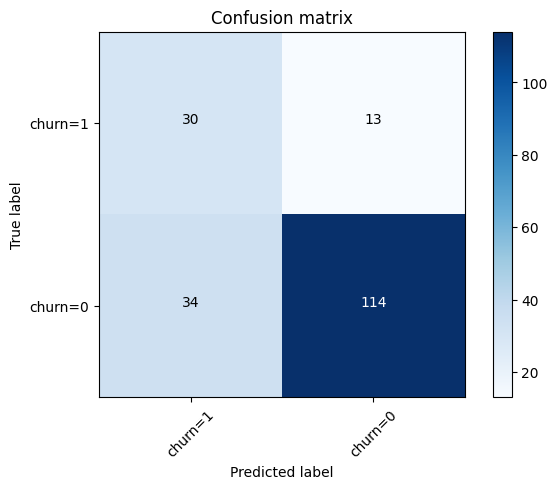

In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [21]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       148
           1       0.47      0.70      0.56        43

    accuracy                           0.75       191
   macro avg       0.68      0.73      0.69       191
weighted avg       0.80      0.75      0.77       191



In [22]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_proba)

0.5182589622399787

In [23]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7080745341614907

In [24]:
sum(y_test==yhat)/len(y_test)*100

75.39267015706807

### Creating a Random Forest Model 

I am going to create the same model with Random forests to see how the accutacy of my model in predicting churn customers will improve or decrease

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
# Instantiate Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=4)

In [27]:
# Train the Random Forest Classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=4)

In [28]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

In [30]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8743455497382199
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       148
           1       0.77      0.63      0.69        43

    accuracy                           0.87       191
   macro avg       0.83      0.79      0.81       191
weighted avg       0.87      0.87      0.87       191

